# BCS105E/MIS550E - Data Science Final Project

## New York City Taxi Rides - 2013

In this project your team is given two datasets with data from approximately 170,000 taxi rides in NYC in the year 2013. This is just a fraction of the original dataset, which contains over 173 Million rides.You can read more about this datset here: https://chriswhong.com/open-data/foil_nyc_taxi/

Your task in this project is to join, clean, transform, explore, analyze this dataset to create at least one baseline model to predict something about the tip of new rides based on some of the provided features. For example, you can try to predict if a ride will generate a tip or not, if the tip will be good or bad (define good or bad), if a tip will be above average, etc. You can pick and choose as many features (columns) you wish to include in the model. The goal is to achieve the best possible prediction power from the dataset.

In this notebook you must create at least one predictive model using any algorithm you want as long as you explain why you chose it and what are you expecting to get from it.

You also must make at least one attempt to improve the model by changing the algorithm, the features, the hyperparameters or any other aspect capable of improving the prediction power of the model.

Your team must turn this notebook in no later than December 2nd, 2022 at 23:59. No late submission will be accepted. The late subission policy will not apply to this assignment and failure to meet this deadline will imply failing the course.

This notebook will be worth 200 points if all aspects of the Data Science pipeline are performed correctly. Among all the teams, the one with the higher overall model improvement will be awarded 50 extra points. This will be calculated by the % of improvement between the score of the baseline model and the best one after tuning/improvement.

On December 7th, each team will have 15 minutes to present the project in class. The presentation will be worth 50 points. The presentation must cover the steps taken in this notebook, such as how the data was cleaned and transformed, the choices made, the hypothesis, the model initial results and the overall result of the model after tuning/improving it. The proesention should not be about code, but about analysis and results: what you had, what you did, why, and what you achieved.

The sections below will serve only as a guide for the main steps you need to follow. You can create and use as many cells for you Python code as you want in this section.

It's likely that you will need a couple of consultations with the professor.
Start working on this project as soon as possible and plan your work so you won't be at any risk of not be able to finish it in time.

# Section 1) Data Ingestion - 20 Points

Look for the files designated for your team in the class Google drive. You need to merge them in Python or SQL and get the full dataset loaded here as a Pandas data frame.

At the end of this section you must have a Pandas data frame with around 170,000 rows and 21 columns to ear the points of this section.

**To earn all the points in this section you must:**
 * Have both files (fare and trips) joined in one single file by the appropriated columns and loaded in this notebook


In [12]:
#Write here how many rows and columns your dataset has at this stage.

import pandas as pd

# Load the fare dataset
fare_df = pd.read_csv('fare.csv')

# Load the trips dataset
trips_df = pd.read_csv('trips.csv')

# Merge the two datasets on the appropriate columns
# Assuming 'trip_id' is a common column in both datasets
print(trips_df.columns)
print(fare_df.columns)

# Define the columns to merge on
merge_columns = ['medallion', 'hack_license', 'pickup_datetime']

# Merge the datasets
merged_df = pd.merge(trips_df, fare_df, on=merge_columns)

# Check the number of rows and columns in the merged dataset
print("Number of rows:", len(merged_df))
print("Number of columns:", len(merged_df.columns))

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')
Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')
Number of rows: 173865
Number of columns: 22


In [13]:
#Start writing your code here:

# Section 2) Data Cleaning and Transformation - 50 Points

In this section you need to inspect, clean and transform your data frame. Start by running some descriptive statistics, look for missing values (NANs), duplicates, capitalization issues, extra spaces on strings, etc. Fix the issues using the techniques demonstrated in class (slides, notebooks).

At the end of this section you must have a cleaned dataset ready to start analysis to earn the points of this section.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Inspect each column of the dataset
 * Identify any inconsistencies in the data (There are at least 5).
 * Fix the inconsitencies
 * Explain why/how you are fixing fixing the inconsistencies
 * Create new features that you bealive will be helpful to make predictions


In [14]:
#Write here how many rows and columns your dataset has at this stage.
print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 173865.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

print(merged_df.columns)

Number of rows: 173865
Number of columns: 22
Index(['medallion', 'hack_license', 'vendor_id_x', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'vendor_id_y', 'payment_type', 'fare_amount',
       'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'],
      dtype='object')


In [15]:
import pandas as pd
import numpy as np

# Assuming merged_df is defined and loaded earlier in your code

# Print all the rows with empty values
empty_rows = merged_df[merged_df.isnull().any(axis=1)]

if not empty_rows.empty:
    print("Rows with Empty Values:\n", empty_rows)
    numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
    merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())
    print("\nEmpty values in numeric columns have been replaced with the mean of the column.")
else:
    print("\nNo rows with empty values found.")

# Print all the rows trip_distance is negative
negative_trip_distances = merged_df[merged_df['trip_distance'] < 0]

if not negative_trip_distances.empty:
    print("\nTrips with Negative Trip Distance:\n", negative_trip_distances)
    merged_df.loc[merged_df['trip_distance'] < 0, 'trip_distance'] = merged_df['trip_distance'].abs()
    print("\nNegative trip distances have been converted to positive.")
else:
    print("\nNo trips with negative trip distance found.")

# Check for duplicate rows and remove them if found
duplicate_rows = merged_df[merged_df.duplicated()]

if not duplicate_rows.empty:
    print(f"Number of duplicate rows found: {duplicate_rows.shape[0]}")
    print(f"Shape of DataFrame before removing duplicates: {merged_df.shape}")
    merged_df = merged_df.drop_duplicates() # Ensure this updates merged_df
    print(f"Shape of DataFrame after removing duplicates: {merged_df.shape}")
else:
    print("No duplicate rows found.")

# Check for rows where pickup_longitude and pickup_latitude are the same
same_location_rows = merged_df[merged_df['pickup_longitude'] == merged_df['pickup_latitude']]

if not same_location_rows.empty:
    print("\nRows where pickup_longitude and pickup_latitude are the same:\n", same_location_rows)
    merged_df = merged_df[merged_df['pickup_longitude'] != merged_df['pickup_latitude']] # Ensure this updates merged_df
    print("\nUpdated DataFrame after removing rows with same pickup_longitude and pickup_latitude:\n", merged_df)
else:
    print("\nNo rows found where pickup_longitude and pickup_latitude are the same.")

# Check for rows where 'passenger_count' is 0
zero_passenger_count_rows = merged_df[merged_df['passenger_count'] == 0]

if not zero_passenger_count_rows.empty:
    print("\nRows where 'passenger_count' is 0:\n", zero_passenger_count_rows)
    merged_df = merged_df[merged_df['passenger_count'] != 0] # Ensure this updates merged_df
    print("\nUpdated DataFrame after handling rows with 'passenger_count' of 0:\n", merged_df)
else:
    print("\nNo rows found where 'passenger_count' is 0.")

Rows with Empty Values:
                                medallion                      hack_license   
5       B505BF57EE08B47D1A9A28F746C46A37  D761DD052975089232D699962F4BEFA7  \
8       AE9C91C2C937D43D0B45301A0C2A7B1D  1DD2326F0BAF89EAFB35A8452CD2121E   
15      01D13A056D9A26F84C328DFDD5534B55  05137E963A1DA985456BF19C3FFC118C   
16      050A9A6A4B28BBC92E6BCA5E130C2936  9197B29FEEDD348EF1945C1FAA09D7C4   
17      C41A7FA97B7C694620442621FC8D8127  1150DE14C283B5CAF3EA6E429D0C1B55   
...                                  ...                               ...   
173856  D08681BDEC767CABA415583497497EDD  2C419CF7D7019DB7847CE614C0727F99   
173859  A5897BD2951329FBF5426235580846B2  66C63810453492EEF86E1D418F377142   
173861  A8608B0C1235FCEB98A71197646FB3D9  C7DE86F6F2F1A0F7640CC1CD0DE0F853   
173862  7E1F23B2F2E4935FD2FA222EAE4C9D74  76DC2668648AB0BF99E40AE45C839286   
173864  6F6DB4FE34210F8B7B47C01B136FFFC1  04BFC194405B0E7F8A23F1FDA917CB47   

       vendor_id_x  rate_code store_an

# Section 3) Data Analysis - 50 Points

In this section, explore your transformed data frame. Create plots (histograms, categorical variable counts, etc,), check correlations between features (columns) and the target variable, check for multi-colinearity.

At the end of this section you must have your data frame ready for modeling according to the hypothesis you want to test to earn the points of this sections. You must explain your hypothesis in terms of which features (columns) you chose, which ones you discarded, what is your target variable and what you are trying to predict.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Analyze how each feature in the dataset may or may not be correlated to what you are trying to predict
 * Decide with features you are keeping in the model and which you are dropping
 * CLEARLY EXPLAIN your theory, which means, why do you think the features your are keeping the the model will be helpful and why the one you are dropping will not.



In [16]:
#Write here how many rows and columns your dataset has at this stage.

print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 86763.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

Number of rows: 170748
Number of columns: 22


In [17]:
# Print the shape of the DataFrame
print("Shape of DataFrame:", merged_df.shape)

# Check the data types of each column
print("\nData Types:\n", merged_df.dtypes)

# Check for missing values
print("\nMissing Values:\n", merged_df.isnull().sum())

print(merged_df.describe())

Shape of DataFrame: (170748, 22)

Data Types:
 medallion              object
hack_license           object
vendor_id_x            object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
vendor_id_y            object
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

Missing Values:
 medallion                 0
hack_license              0
vendor_id_x              99
rate_code                 0
store_and_fwd_flag    85282
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_time_in_secs         0
trip_dist

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histogram for numeric variables
# merged_df.hist(figsize=(10, 10))
# plt.show()

# # Bar plot for categorical variables
# for col in merged_df.select_dtypes(include=['object']).columns:
#     merged_df[col].value_counts().plot(kind='bar')
#     plt.title(col)
#     plt.show()

# # Scatter plot matrix for numeric variables
# sns.pairplot(merged_df.select_dtypes(include=[np.number]))
# plt.show()

# # Calculate correlations
# correlations = merged_df.corr()

# # Plot heatmap of correlations
# sns.heatmap(correlations, annot=True, cmap='coolwarm')
# plt.show()

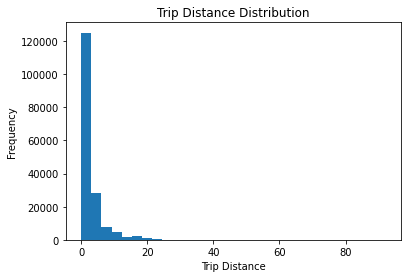

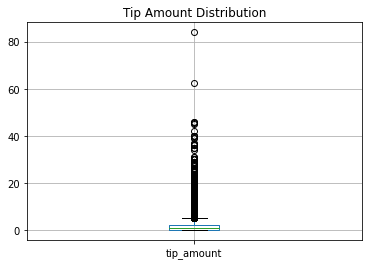

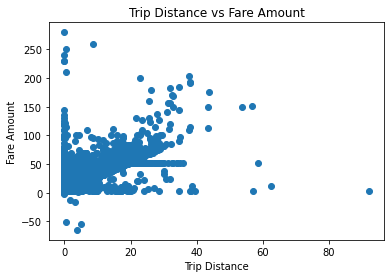

In [19]:
import matplotlib.pyplot as plt

# Example: Histogram of 'trip_distance'
plt.hist(merged_df['trip_distance'], bins=30)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

# Example: Box plot of 'tip_amount'
merged_df.boxplot(column=['tip_amount'])
plt.title('Tip Amount Distribution')
plt.show()

# Example: Scatter plot of 'trip_distance' vs 'fare_amount'
plt.scatter(merged_df['trip_distance'], merged_df['fare_amount'])
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

# import seaborn as sns

# # Correlation matrix
# corr_matrix = merged_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [20]:
# Assuming 'df' is your transformed data frame
print(merged_df.info())
print(merged_df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='numerical_variable', kde=True)
plt.show()

# Example: Count plot for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='categorical_variable')
plt.show()

# Correlation matrix
correlation_matrix = merged_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["variables"] = merged_df.columns
vif["VIF"] = [variance_inflation_factor(merged_df.values, i) for i in range(dmerged_df.shape[1])]

print(vif)

# Example: Dropping a feature
merged_df.drop('unimportant_feature', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 170748 entries, 0 to 173864
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   medallion           170748 non-null  object 
 1   hack_license        170748 non-null  object 
 2   vendor_id_x         170649 non-null  object 
 3   rate_code           170748 non-null  int64  
 4   store_and_fwd_flag  85466 non-null   object 
 5   pickup_datetime     170748 non-null  object 
 6   dropoff_datetime    170748 non-null  object 
 7   passenger_count     170748 non-null  int64  
 8   trip_time_in_secs   170748 non-null  int64  
 9   trip_distance       170748 non-null  float64
 10  pickup_longitude    170748 non-null  float64
 11  pickup_latitude     170748 non-null  float64
 12  dropoff_longitude   170748 non-null  float64
 13  dropoff_latitude    170748 non-null  float64
 14  vendor_id_y         170649 non-null  object 
 15  payment_type        170748 non-null  ob

ValueError: Could not interpret value `numerical_variable` for `x`. An entry with this name does not appear in `data`.

<Figure size 720x432 with 0 Axes>

# Section 4) Modeling and evaluation: Baseline model - 50 Points

In this section you must perform all the actions necessary for creating a predictive model with Machine Learning. These actions include, but are not limited to, selecting an algorithm, split your data frame in train and test subsets, train the model, select the evaluation metric, make predictions and evaluate the model.

The earn the points in this section you must be able to fit a model, make predictions and evaluate the model using a metric that you have selected.

**To earn all the points in this section you must:**
 * Create a model by importing, instantiating and fitting one of the algorithms studied in the class.
 * Use the model to make prediction on unseen data (y_train)
 * Compare the predictions with the known labels (y_test) and evaluate the model using the appropriated metrics. This will be your baseline model.
 * Provide the correct interpretation on the metric. Is the model performing well? how well? why?




In [21]:
#Write here how many rows and columns your dataset has at this stage.

print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 170748.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

Number of rows: 170748
Number of columns: 22


In [26]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from joblib import dump


# Load the data
trips_df = pd.read_csv('trips.csv')
fare_df = pd.read_csv('fare.csv')

# Merge the datasets
merged_df = pd.merge(trips_df, fare_df, on=['medallion', 'hack_license', 'pickup_datetime'])

# Select features and target variable
X = merged_df[['trip_distance', 'passenger_count', 'pickup_datetime']]
y = merged_df['fare_amount']

from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Select features and target variable
X = merged_df[['trip_distance', 'passenger_count', 'pickup_datetime']]
y = merged_df['fare_amount']

from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Convert 'pickup_datetime' to datetime format
merged_df['pickup_datetime'] = pd.to_datetime(merged_df['pickup_datetime'])

# Convert 'pickup_datetime' to Unix timestamp by first converting to int64
merged_df['pickup_datetime'] = merged_df['pickup_datetime'].astype('int64') / 10**9

# Now, you can proceed with feature selection and splitting the data
X = merged_df[['trip_distance', 'passenger_count', 'pickup_datetime']]
y = merged_df['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model
dump(model, 'model.joblib')

# Interpretation
print("The model's performance is evaluated based on the Mean Squared Error (MSE). A lower MSE indicates a better fit of the model to the data.")
print(f"The MSE of the model is {mse}.")

Mean Squared Error: 23.511226206409564
The model's performance is evaluated based on the Mean Squared Error (MSE). A lower MSE indicates a better fit of the model to the data.
The MSE of the model is 23.511226206409564.


# Section 5) Model improvement and tuning - 30 Points

In this section you must improve the reults of your baseline model. Try adding/removing features, changing hyperparameters, grid search, ensembles, cross-validation, etc. Compare the performance of this improved model with the previous one using the same metric. Explain your your results and conclusions.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Improve your baseline model by applying at least one of the techniques studied in class (different algorith, different features, Hyperparameter tuning, Cross Validation, GridSearchCV, etc)
 * Evaluate the performace of the new model using the appropriated metric and compare it with the baseline model.
 * Provide the correct interpretation on the two metrics. Which model is performing better? how much better? why?

In [27]:
#Write here how many rows and columns your dataset has at this stage.

print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 170748.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

Number of rows: 173865
Number of columns: 22


In [ ]:
#Start writing your code here:

